In [93]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [94]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [153]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,windows_size, look_ahead=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size-look_ahead-1):
        a = dataset[i:(i+window_size), 0]
        b= dataset[i:(i+window_size),1]
        dataX.append((a,b))
        dataY.append(dataset[i+window_size + look_ahead-1, 0])
    return numpy.array(dataX), numpy.array(dataY)

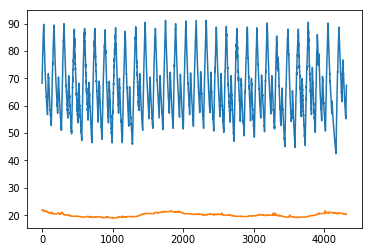

In [154]:
P1dataset = pandas.read_csv('piecstyczen.csv', usecols=[2,3], engine='python', skipfooter=3)
#P2dataset= pandas.read_csv('piec.csv', usecols=[2], engine='python', skipfooter=3)
plt.plot(P1dataset)
#plt.plot(P2dataset)
plt.show()

In [155]:
P1dataset.tail(4)

,C1,C2
4313,63.50,20.3
4314,64.25,20.3
4315,66.25,20.3
4316,67.50,20.3


In [156]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scalerB= MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(P1dataset)
#datasetB = scalerB.fit_transform(P2dataset)


In [157]:
dataset

array([[0.52820513, 0.93333333],
       [0.55384615, 0.93333333],
       [0.56923077, 0.93333333],
       ...,
       [0.44615385, 0.43333333],
       [0.48717949, 0.43333333],
       [0.51282051, 0.43333333]])

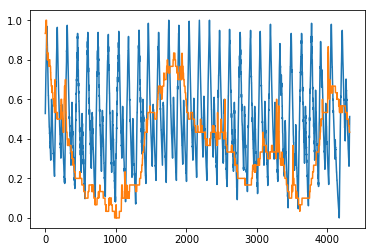

In [158]:
plt.plot(dataset)
#plt.plot(datasetB)
plt.show()

In [162]:
dataset

array([[0.52820513, 0.93333333],
       [0.55384615, 0.93333333],
       [0.56923077, 0.93333333],
       ...,
       [0.44615385, 0.43333333],
       [0.48717949, 0.43333333],
       [0.51282051, 0.43333333]])

In [163]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2892 1425


In [164]:
# reshape into X=t and Y=t+1
look_back = 5
window_size=10
trainX, trainY = create_dataset(train, window_size,look_back)
testX, testY = create_dataset(test, window_size,look_back)

In [165]:
testY.shape

(1409,)

In [166]:
trainX[0:8]

array([[[0.52820513, 0.55384615, 0.56923077, 0.6       , 0.61025641,
         0.63589744, 0.66153846, 0.68205128, 0.70769231, 0.73333333],
        [0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
         0.96666667, 0.96666667, 0.96666667, 0.96666667, 1.        ]],

       [[0.55384615, 0.56923077, 0.6       , 0.61025641, 0.63589744,
         0.66153846, 0.68205128, 0.70769231, 0.73333333, 0.74358974],
        [0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.96666667,
         0.96666667, 0.96666667, 0.96666667, 1.        , 1.        ]],

       [[0.56923077, 0.6       , 0.61025641, 0.63589744, 0.66153846,
         0.68205128, 0.70769231, 0.73333333, 0.74358974, 0.76410256],
        [0.93333333, 0.93333333, 0.93333333, 0.96666667, 0.96666667,
         0.96666667, 0.96666667, 1.        , 1.        , 1.        ]],

       [[0.6       , 0.61025641, 0.63589744, 0.66153846, 0.68205128,
         0.70769231, 0.73333333, 0.74358974, 0.76410256, 0.77948718],
        [0.93333333, 

In [167]:
trainY[1]

0.8358974358974358

In [168]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = testX.reshape(testX.shape[0],  testX.shape[1],1)
#testX = testX.reshape(testX.shape + (1,))
#trainX=trainX.reshape(trainX.shape+ (1,))

In [169]:
# reshape input to be [samples, time steps, features]
# when 1 features
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [170]:
trainX.shape
#dataset.shape

(2876, 2, 10)

In [171]:
trainX.reshape(-1,4)

array([[0.52820513, 0.55384615, 0.56923077, 0.6       ],
       [0.61025641, 0.63589744, 0.66153846, 0.68205128],
       [0.70769231, 0.73333333, 0.93333333, 0.93333333],
       ...,
       [0.51282051, 0.52820513, 0.16666667, 0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667]])

In [172]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4,activation=None ,input_shape=(2,window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
 - 4s - loss: 0.0207
Epoch 2/20
 - 3s - loss: 0.0074
Epoch 3/20
 - 3s - loss: 0.0042
Epoch 4/20
 - 4s - loss: 0.0036
Epoch 5/20
 - 4s - loss: 0.0034
Epoch 6/20
 - 3s - loss: 0.0032
Epoch 7/20
 - 4s - loss: 0.0031
Epoch 8/20
 - 4s - loss: 0.0029
Epoch 9/20
 - 3s - loss: 0.0029
Epoch 10/20
 - 4s - loss: 0.0028
Epoch 11/20
 - 4s - loss: 0.0027
Epoch 12/20
 - 3s - loss: 0.0026
Epoch 13/20
 - 4s - loss: 0.0026
Epoch 14/20
 - 4s - loss: 0.0025
Epoch 15/20
 - 3s - loss: 0.0025
Epoch 16/20
 - 4s - loss: 0.0024
Epoch 17/20
 - 4s - loss: 0.0024
Epoch 18/20
 - 4s - loss: 0.0023
Epoch 19/20
 - 3s - loss: 0.0023
Epoch 20/20
 - 4s - loss: 0.0023


In [173]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict[0]

array([0.82228494], dtype=float32)

In [174]:
#trainPredict.reshape(-1)
#trainPb = numpy.append(trainPredict,numpy.zeros([len(trainPredict),1]),1)
#trainYb=numpy.append(trainY,numpy.zeros([len(trainY),1]),0)
#testPredict.reshape(-1)
trainYY=trainY.reshape(trainY.shape+(1,))
testYY=testY.reshape(testY.shape+(1,))
testYY[1:10]


array([[0.90769231],
       [0.91282051],
       [0.91282051],
       [0.93333333],
       [0.94871795],
       [0.91282051],
       [0.88205128],
       [0.88205128],
       [0.87179487]])

In [175]:
#x=[trainY,trainY]
#yy= scaler.inverse_transform(x)
testPredictA=testPredict-testYY
testPredictA[1:10]

array([[ 0.01470793],
       [ 0.01926536],
       [ 0.02674306],
       [ 0.0003174 ],
       [-0.02949494],
       [ 0.00848681],
       [ 0.03343106],
       [ 0.01983053],
       [ 0.03347815]])

In [176]:
# convert an array of values into a dataset matrix
def inverse_dataset(_scaler,dset):
    x=numpy.append(dset,dset,1)
    yy= _scaler.inverse_transform(x)
    return yy[:,0]

In [177]:
# invert predictions
trainSPredict = inverse_dataset(scaler,trainPredict)
trainSY = inverse_dataset(scaler,trainYY)
trainSPredict
#testPredict = inverse_dataset(testPredict)
#testY = inverse_dataset([testY])

array([82.58639 , 83.32908 , 83.47363 , ..., 68.83292 , 69.145645,
       69.678665], dtype=float32)

In [178]:
# calculate root mean squared error
wws=window_size+look_back-1
#trainScore = math.sqrt(mean_squared_error(dataset[wws:len(trainY)+wws,0], trainY))
trainScore = math.sqrt(mean_squared_error( trainY,trainPredict))
print('Train Score: %.5f RMSE' % (trainScore))
trainSScore = math.sqrt(mean_squared_error(trainSY, trainSPredict))
print('Train SScore: %.5f RMSE' % (trainSScore))
testScore = math.sqrt(mean_squared_error(testYY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.04676 RMSE
Train SScore: 2.27943 RMSE
Test Score: 0.063 RMSE


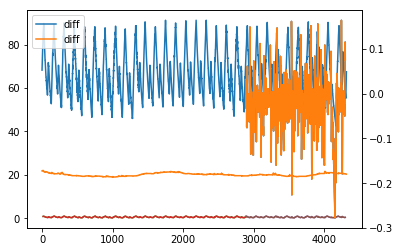

In [179]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=window_size+look_back;
trainPredictPlot[wws:len(trainPredict)+wws, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-window_size-look_back-1, :] = testPredict
diffPlot=testYY-testPredict
diffPredictPlot = numpy.empty_like(dataset)
diffPredictPlot[:, :] = numpy.nan
diffPredictPlot[len(trainPredict)+wws+1:len(dataset)-window_size-look_back-1, :] = diffPlot
# plot baseline and predictions
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(scaler.inverse_transform(dataset),label="set")
ax1.plot(trainPredictPlot,label="train")
ax1.plot(testPredictPlot,label="test")
ax2.plot(diffPredictPlot,label="diff")
plt.legend()
plt.show()